In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time

# preparing the dataFrames


In [11]:
intervals = np.load('resampled_sentiment.npy',allow_pickle='TRUE').item()

In [35]:
intervals

{'5min':                      negative   neutral  positive  compound  text
 date                                                             
 2021-07-17 12:00:00  0.033583  0.865492  0.100947  0.193783   132
 2021-07-17 12:05:00  0.040397  0.841904  0.117685  0.221316    73
 2021-07-17 12:10:00  0.050427  0.852844  0.096729  0.158877    96
 2021-07-17 12:15:00  0.035825  0.885587  0.078575  0.153381    80
 2021-07-17 12:20:00  0.038988  0.852361  0.108675  0.185848    83
 ...                       ...       ...       ...       ...   ...
 2021-07-29 23:35:00  0.039108  0.853009  0.107883  0.224949   111
 2021-07-29 23:40:00  0.024989  0.895076  0.079946  0.153538    92
 2021-07-29 23:45:00  0.022383  0.857878  0.119730  0.275984   115
 2021-07-29 23:50:00  0.041355  0.845645  0.112991  0.209935   107
 2021-07-29 23:55:00  0.043422  0.815256  0.141322  0.269669    90
 
 [3600 rows x 5 columns],
 '15min':                      negative   neutral  positive  compound  text
 date            

In [21]:
price_1H = pd.read_csv('3600-sliced.csv')
price_30m = pd.read_csv('1800-sliced.csv')

In [22]:
price_1H

,Unnamed: 0,timestamp,open,high,low,close,volume,trade
0,15868,1626523200,31377.01,31570.00,31330.12,31489.01,14325.922,116879
1,15869,1626526800,31489.00,31750.00,31329.00,31607.99,29114.409,214698
2,15870,1626530400,31607.99,31738.83,31572.00,31622.35,15550.348,125076
3,15871,1626534000,31621.48,31750.00,31433.72,31737.92,23013.314,164851
4,15872,1626537600,31737.87,31849.00,31614.72,31677.24,24002.979,174697
...,...,...,...,...,...,...,...,...
296,16164,1627588800,39647.85,39830.00,39600.00,39715.49,7881.098,102117
297,16165,1627592400,39715.49,39761.11,39465.66,39522.27,9108.069,107487
298,16166,1627596000,39522.61,39812.34,39506.81,39773.85,9615.746,111277
299,16167,1627599600,39773.85,40400.00,39757.00,40012.90,31826.597,281361


In [23]:
price_1H['date'] = price_1H.timestamp.apply(lambda x: datetime.fromtimestamp(x))
price_30m['date'] = price_30m.timestamp.apply(lambda x: datetime.fromtimestamp(x))

In [24]:
price_1H

,Unnamed: 0,timestamp,open,high,low,close,volume,trade,date
0,15868,1626523200,31377.01,31570.00,31330.12,31489.01,14325.922,116879,2021-07-17 15:30:00
1,15869,1626526800,31489.00,31750.00,31329.00,31607.99,29114.409,214698,2021-07-17 16:30:00
2,15870,1626530400,31607.99,31738.83,31572.00,31622.35,15550.348,125076,2021-07-17 17:30:00
3,15871,1626534000,31621.48,31750.00,31433.72,31737.92,23013.314,164851,2021-07-17 18:30:00
4,15872,1626537600,31737.87,31849.00,31614.72,31677.24,24002.979,174697,2021-07-17 19:30:00
...,...,...,...,...,...,...,...,...,...
296,16164,1627588800,39647.85,39830.00,39600.00,39715.49,7881.098,102117,2021-07-29 23:30:00
297,16165,1627592400,39715.49,39761.11,39465.66,39522.27,9108.069,107487,2021-07-30 00:30:00
298,16166,1627596000,39522.61,39812.34,39506.81,39773.85,9615.746,111277,2021-07-30 01:30:00
299,16167,1627599600,39773.85,40400.00,39757.00,40012.90,31826.597,281361,2021-07-30 02:30:00


In [27]:
price_1H.set_index('date' , inplace=True)
price_30m.set_index('date' , inplace=True)

In [28]:
price_1H.drop('timestamp', axis=1 , inplace=True)
price_1H.drop('Unnamed: 0', axis=1 , inplace=True)
price_30m.drop('timestamp', axis=1 , inplace=True)
price_30m.drop('Unnamed: 0', axis=1 , inplace=True)

In [30]:
roc = lambda x: (x / x.shift(1) - 1)

In [61]:
print(len(roc(price_1H['close'])[1:]))
len(intervals['h']['neutral'])
ccf1 = np.correlate(roc(price_1H['close']), intervals['h']['neutral'], "full")
ccf2 = np.correlate(roc(price_30m['close']),intervals['30min']['neutral'],'full')
print(len(ccf2))

300
1200


In [64]:

print(np.nanmax(ccf2))
print(np.nanmax(ccf1))

0.27316317807016743
0.2700435277631339


In [56]:
max_indices_ccf1 = np.where(ccf1 == np.nanmax(ccf1))[0]
max_indices_ccf2 = np.where(ccf2 == np.nanmax(ccf2))[0]

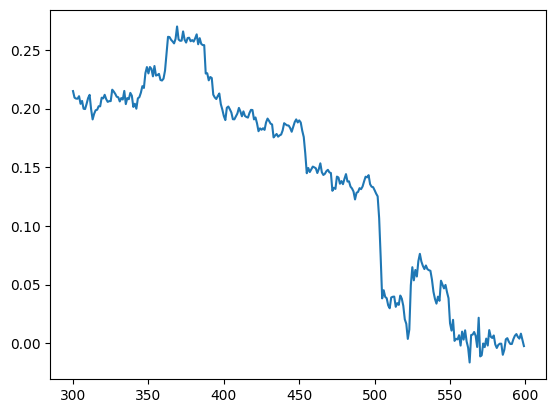

In [65]:
plt.plot(ccf1)

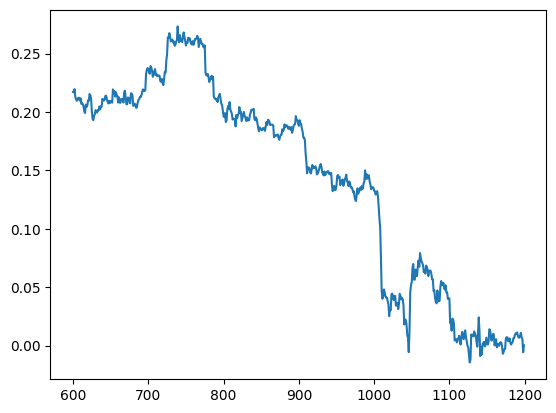

In [66]:
plt.plot(ccf2)